In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set chart style
sns.set_theme(style="whitegrid")

def load_and_compare_models(model_files: dict):
    """
    Loads CSV files and creates a single DataFrame for comparison.
    
    Args:
        model_files: Dictionary { 'Model Name': 'path/to/report.csv' }
    """
    df_list = []
    
    for model_name, file_path in model_files.items():
        if not os.path.exists(file_path):
            print(f"Warning: File not found for {model_name} -> {file_path}")
            continue
            
        df = pd.read_csv(file_path)
        df['Model'] = model_name  # Add column with model name
        df_list.append(df)
    
    if not df_list:
        raise ValueError("No files loaded successfully.")
        
    full_df = pd.concat(df_list, ignore_index=True)
    return full_df

def plot_leaderboard(df, metric='ADD-0.1d Accuracy (%)', ascending=False):
    """
    Summary plot: average of the chosen metric across all objects.
    """
    # Calculate mean for each model
    leaderboard = df.groupby('Model')[metric].mean().reset_index()
    # Sort: True if metric is error (lower is better), False if accuracy (higher is better)
    leaderboard = leaderboard.sort_values(by=metric, ascending=not ascending) 
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=leaderboard, x='Model', y=metric, hue='Model', palette='viridis', legend=False)
    
    # Add values on top of bars
    for i in ax.containers:
        ax.bar_label(i, fmt='%.2f', padding=3)
        
    plt.title(f"Global Comparison: {metric} (Mean across all objects)")
    plt.ylabel("Mean Value")
    plt.ylim(0, 105 if 'Accuracy' in metric else None)
    plt.tight_layout()
    plt.show()
    
    return leaderboard

def plot_per_object_comparison(df, metric='ADD-0.1d Accuracy (%)'):
    """
    Detailed plot: comparison for each individual object.
    """
    plt.figure(figsize=(14, 6))
    
    # Grouped bar chart
    sns.barplot(
        data=df, 
        x='Object Name', 
        y=metric, 
        hue='Model', 
        palette='magma',
        edgecolor='black'
    )
    
    plt.title(f"Per-Object Detail: {metric}")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')
    
    # If metric is accuracy, fix limit to 100
    if 'Accuracy' in metric:
        plt.ylim(0, 105)
        plt.axhline(100, color='gray', linestyle='--', alpha=0.5)
        
    plt.tight_layout()
    plt.show()

def get_comparison_tables(df):
    """
    1. Filters relevant columns
    2. Groups by Model and computes mean
    3. Sorts by ADD-0.1d Accuracy descending
    4. Renames columns for LaTeX clarity
    5. Outputs LaTeX table code
    6. Returns the summary DataFrame
    """
    
    # 1. Filter relevant columns
    cols_to_keep = [
        'Mean ADD (mm)', 
        'ADD-0.1d Accuracy (%)', 
        'ADD-S-0.1d Accuracy (%)'
    ]
    
    # Keep only existing columns
    actual_cols = [c for c in cols_to_keep if c in df.columns]
    
    # 2. Group by Model e compute mean
    summary_df = df.groupby('Model')[actual_cols].mean().reset_index()
    
    # 3. Sort by ADD-0.1d Accuracy descending
    if 'ADD-0.1d Accuracy (%)' in summary_df.columns:
        summary_df = summary_df.sort_values(by='ADD-0.1d Accuracy (%)', ascending=False)
    
    # 4. Renaming for LaTeX clarity
    latex_df = summary_df.copy()
    rename_map = {
        'ADD-0.1d Accuracy (%)': 'ADD-0.1d Acc (%)',
        'ADD-S-0.1d Accuracy (%)': 'ADD-S-0.1d Acc (%)'
    }
    latex_df = latex_df.rename(columns=rename_map)
    
    # 5. LaTeX output
    # print("\n" + "="*50)
    # print("CODICE LATEX")
    # print("="*50)
    
    # latex_code = latex_df.to_latex(
    #     index=False,
    #     float_format="%.2f",
    #     caption="Comparison of 6D Pose Estimation Models",
    #     label="tab:model_comparison",
    #     column_format="l" + "c" * (len(latex_df.columns) - 1)
    # )
    # print(latex_code)
    # print("="*50 + "\n")

    # 6. Return the summary DataFrame
    return summary_df


# Using GT BBoxes

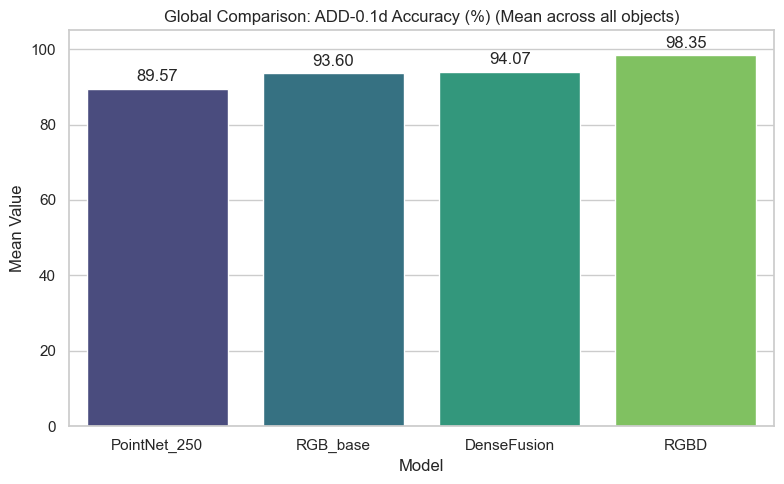

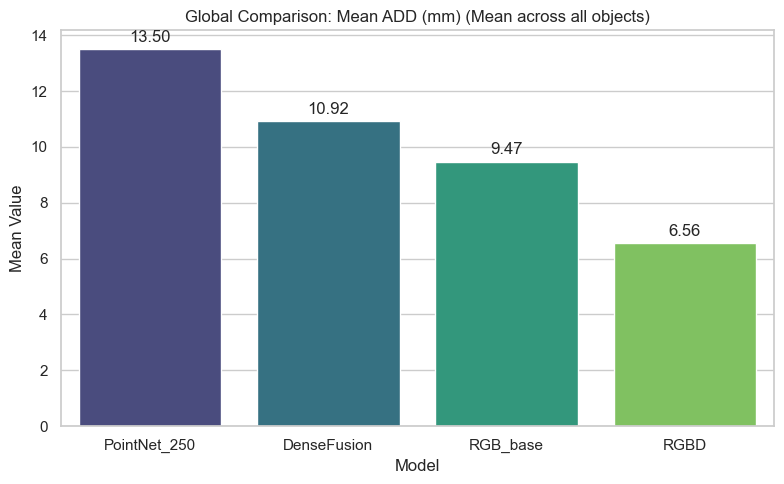

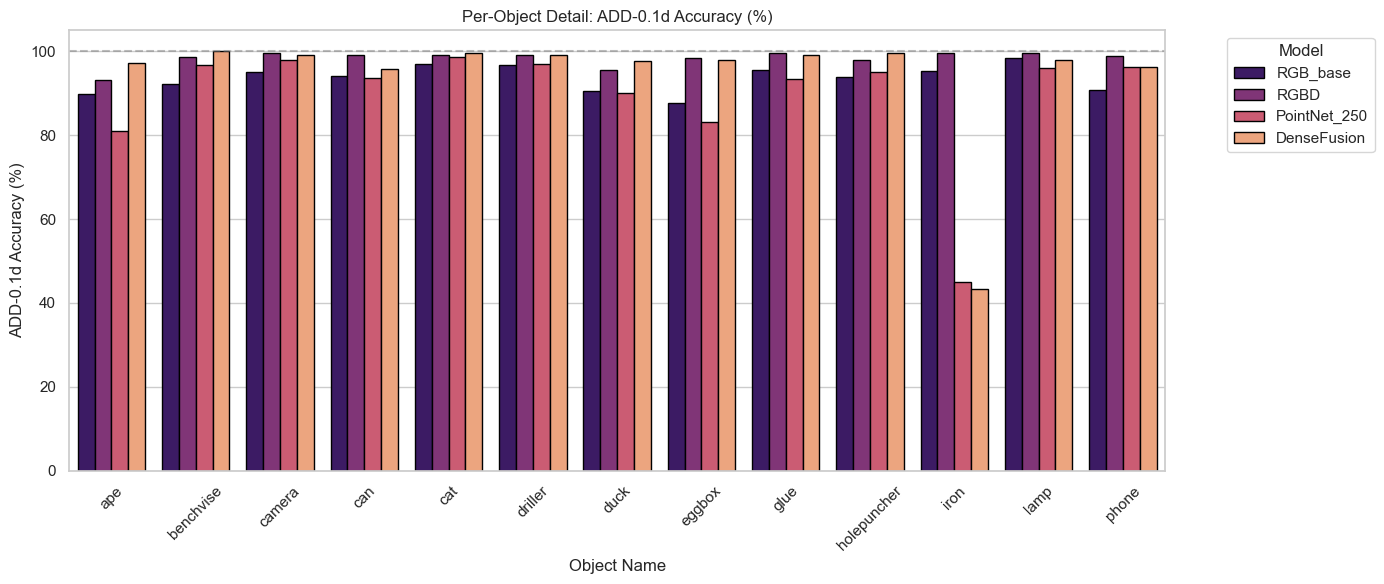

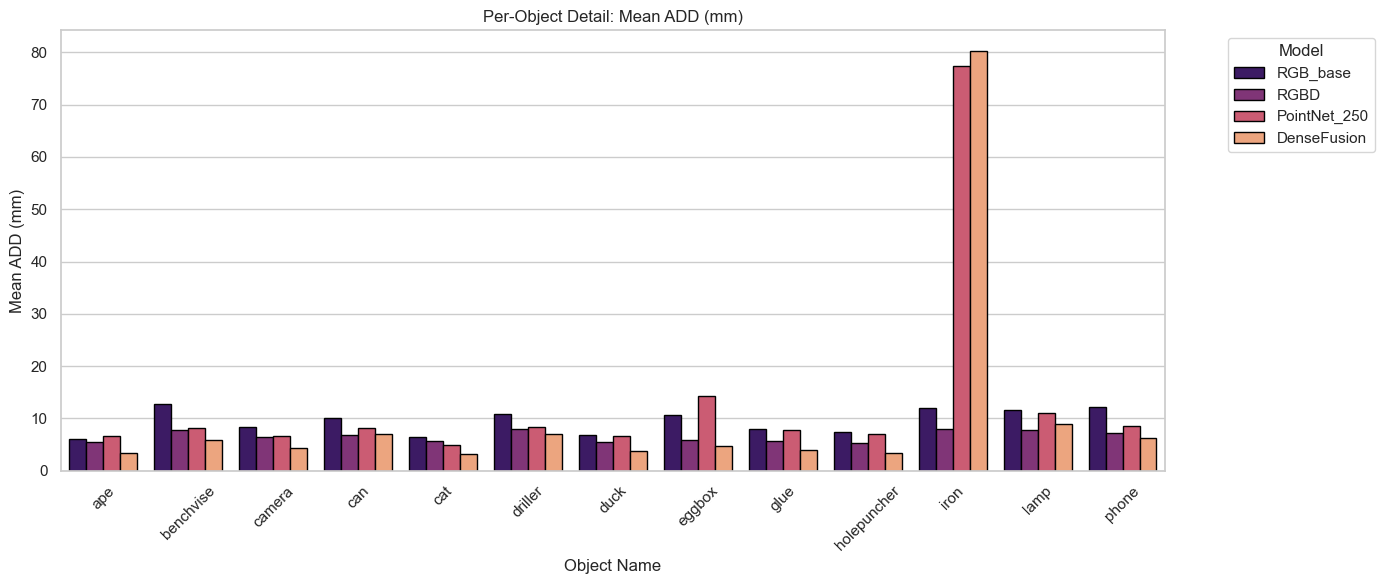

,Model,Mean ADD (mm),ADD-0.1d Accuracy (%),ADD-S-0.1d Accuracy (%)
2,RGBD,6.562004,98.347677,100.000000
0,DenseFusion,10.916032,94.073424,99.936679
3,RGB_base,9.473621,93.600699,99.938336
1,PointNet_250,13.498667,89.574768,99.874746


In [2]:
# Load data
files = {
    'RGB_base': './models_reports/6d_part/rgb_final.csv',
    'RGBD': './models_reports/6d_part/rgbd_final.csv',
    'PointNet_250': './models_reports/6d_part/pointnet_250.csv',
    'DenseFusion': './models_reports/6d_part/dense_fusion.csv',
}
full_df = load_and_compare_models(files)

# -------------------------------------------------------

# Run visualizations

# A. Global Leaderboard (Accuracy - Higher is better)
leaderboard = plot_leaderboard(full_df, metric='ADD-0.1d Accuracy (%)', ascending=False)

# B. Global Leaderboard (Errore ADD - Lower is better)
plot_leaderboard(full_df, metric='Mean ADD (mm)', ascending=True)

# C. Fine grained per object comparison (Accuracy)
plot_per_object_comparison(full_df, metric='ADD-0.1d Accuracy (%)')

# D. Fine grained per object comparison (Mean ADD)
plot_per_object_comparison(full_df, metric='Mean ADD (mm)')

# E. Generate comparison tables
get_comparison_tables(full_df)



# Using Yolo BBoxes

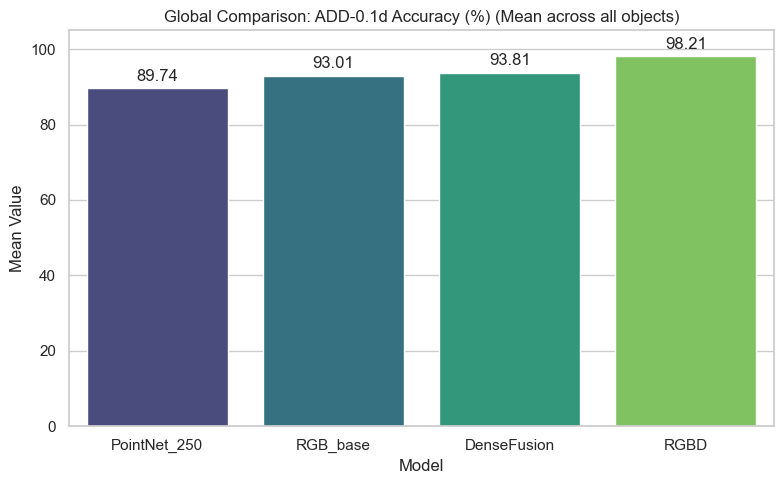

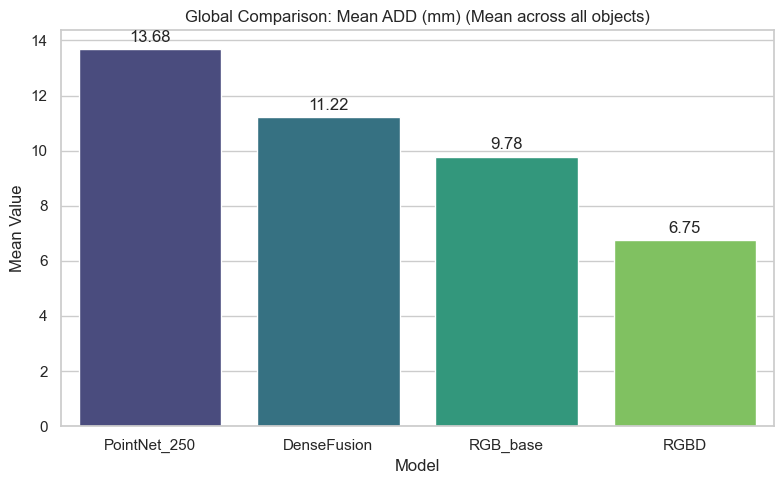

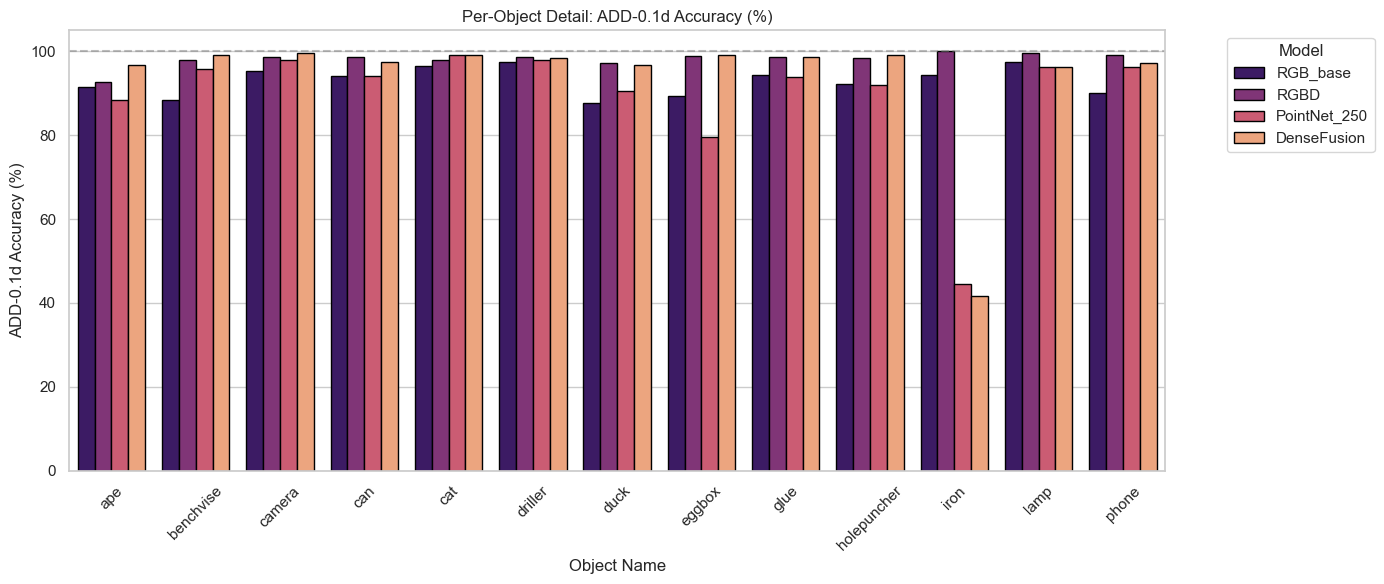

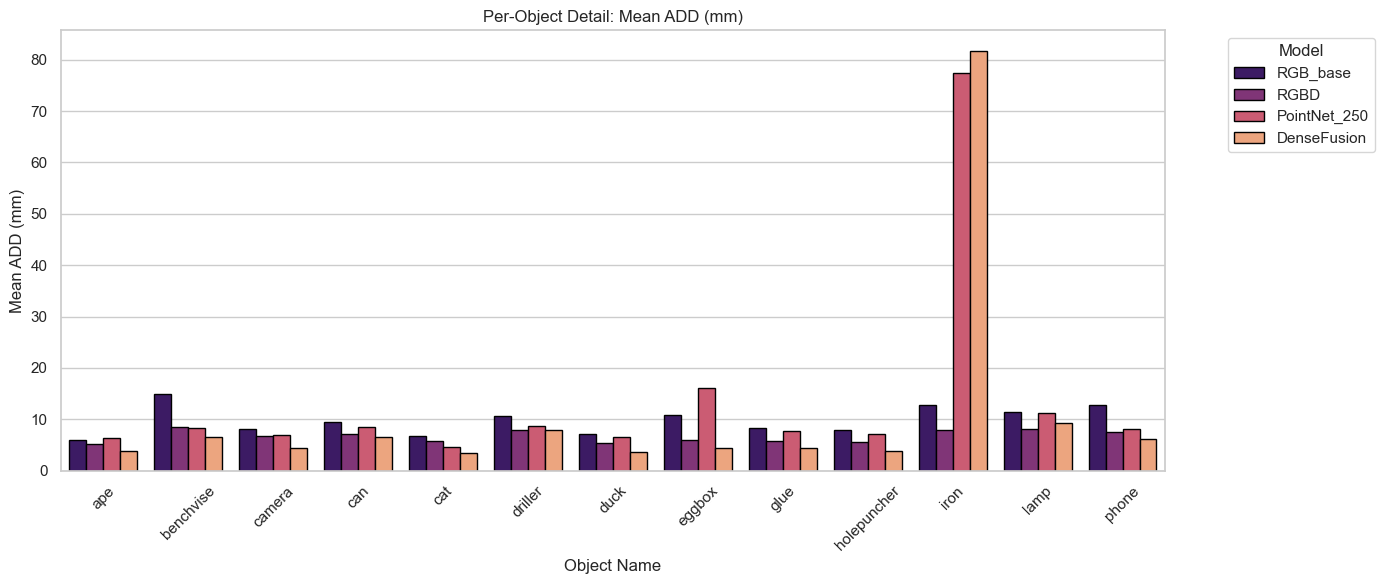

,Model,Mean ADD (mm),ADD-0.1d Accuracy (%),ADD-S-0.1d Accuracy (%)
2,RGBD,6.754788,98.213398,99.937075
0,DenseFusion,11.221116,93.813594,99.934379
3,RGB_base,9.784883,93.006745,99.906559
1,PointNet_250,13.679820,89.735240,99.903110


In [3]:
# Load data
files = {
    'RGB_base': './models_reports/full_pipeline/rgb_final.csv',
    'RGBD': './models_reports/full_pipeline/rgbd_final.csv',
    'PointNet_250': './models_reports/full_pipeline/pointnet_250.csv',
    'DenseFusion': './models_reports/full_pipeline/dense_fusion.csv',
}
full_df = load_and_compare_models(files)

# -------------------------------------------------------

# Run visualizations

# A. Global Leaderboard (Accuracy - Higher is better)
leaderboard = plot_leaderboard(full_df, metric='ADD-0.1d Accuracy (%)', ascending=False)

# B. Global Leaderboard (Errore ADD - Lower is better)
plot_leaderboard(full_df, metric='Mean ADD (mm)', ascending=True)

# C. Fine grained per object comparison (Accuracy)
plot_per_object_comparison(full_df, metric='ADD-0.1d Accuracy (%)')

# D. Fine grained per object comparison (Mean ADD)
plot_per_object_comparison(full_df, metric='Mean ADD (mm)')

# E. Generate comparison tables
get_comparison_tables(full_df)



# Comparison between GT and YOLO evaluation

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_paired_data(gt_files: dict, yolo_files: dict):
    """
    Loads and merges GT and YOLO reports.
    
    Args:
        gt_files: Dict { 'ModelName': 'path/to/gt_report.csv' }
        yolo_files: Dict { 'ModelName': 'path/to/yolo_report.csv' }
    """
    df_list = []
    
    # Helper interno per caricare
    def _load(files_dict, source_type):
        for model_name, file_path in files_dict.items():
            if not os.path.exists(file_path):
                print(f"Warning: File not found for {model_name} ({source_type}) -> {file_path}")
                continue
            df = pd.read_csv(file_path)
            df['Model'] = model_name
            df['Source'] = source_type # 'GT' or 'YOLO'
            df_list.append(df)

    _load(gt_files, 'GT')
    _load(yolo_files, 'YOLO')
    
    if not df_list:
        raise ValueError("No files loaded.")
        
    return pd.concat(df_list, ignore_index=True)

def plot_gt_vs_yolo_summary(df, metric='ADD-0.1d Accuracy (%)'):
    """
    Visualizes the performance gap between GT and YOLO for each model.
    """
    # Group by Model and Source to get global mean
    summary = df.groupby(['Model', 'Source'])[metric].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    
    # Barplot with 'hue' distinguishing GT vs YOLO
    ax = sns.barplot(
        data=summary, 
        x='Model', 
        y=metric, 
        hue='Source', 
        palette={'GT': '#2ecc71', 'YOLO': '#e74c3c'}, # Green for GT, Red for YOLO
        alpha=0.9
    )
    
    # Add values on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', padding=3, fontsize=9)
        
    plt.title(f"Impact of Detection Quality: GT vs YOLO ({metric})")
    plt.ylim(0, 110 if 'Accuracy' in metric else None)
    plt.legend(title='BBox Source')
    plt.tight_layout()
    plt.show()

def plot_yolo_drop_heatmap(df, metric='ADD-0.1d Accuracy (%)'):
    """
    Creates a Heatmap showing the 'Accuracy Drop' (GT - YOLO) per object.
    Red/Hot colors = High drop (YOLO hurts a lot).
    Blue/Cool colors = Low drop (YOLO works almost as well as GT).
    """
    # 1. Aggregate mean per Model, Object and Source
    grouped = df.groupby(['Model', 'Object Name', 'Source'])[metric].mean().reset_index()
    
    # 2. Pivot to have GT and YOLO as columns
    pivoted = grouped.pivot(index=['Model', 'Object Name'], columns='Source', values=metric).reset_index()
    
    # 3. Calculate Drop (GT - YOLO)
    # If metric is error (like ADD), drop might be negative, handle accordingly.
    # Assuming Accuracy here:
    pivoted['Drop'] = pivoted['GT'] - pivoted['YOLO']
    
    # 4. Pivot again for Heatmap: Index=Model, Col=Object, Val=Drop
    heatmap_data = pivoted.pivot(index='Model', columns='Object Name', values='Drop')
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".1f", 
        cmap="Reds", 
        cbar_kws={'label': f'Accuracy Drop (GT - YOLO) %'},
        linewidths=.5
    )
    plt.title(f"YOLO Sensitivity Analysis: Which objects suffer most?")
    plt.tight_layout()
    plt.show()
    
    return heatmap_data

def get_gt_vs_yolo_table(df, metric='ADD-0.1d Accuracy (%)'):
    """
    Returns a DataFrame comparing GT vs YOLO global means with Delta column.
    """
    summary = df.groupby(['Model', 'Source'])[metric].mean().unstack()
    
    summary['GT'] = summary['GT']
    summary['YOLO'] = summary['YOLO']
    summary['Drop (%)'] = summary['GT'] - summary['YOLO']
    summary['Retained Perf (%)'] = (summary['YOLO'] / summary['GT']) * 100
    
    # Sort by best YOLO performance
    summary = summary.sort_values(by='YOLO', ascending=False)
    
    return summary.round(2)

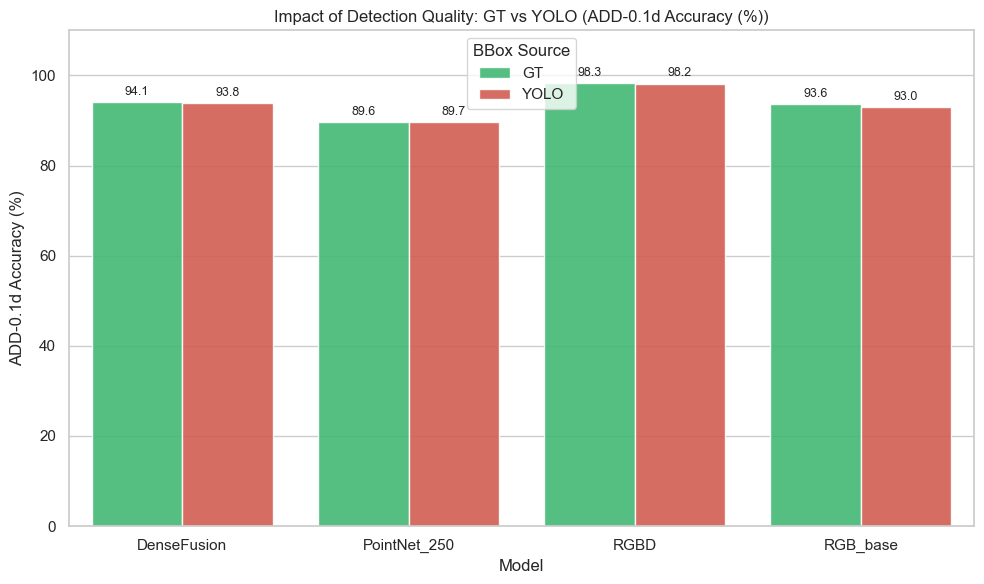

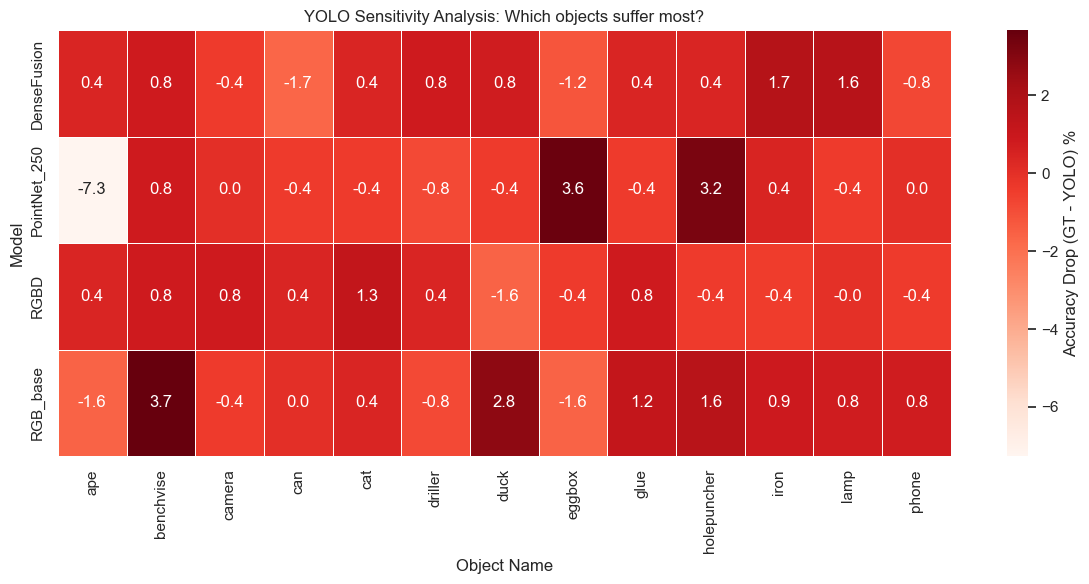

Source           GT   YOLO  Drop (%)  Retained Perf (%)
Model                                                  
RGBD          98.35  98.21      0.13              99.86
DenseFusion   94.07  93.81      0.26              99.72
RGB_base      93.60  93.01      0.59              99.37
PointNet_250  89.57  89.74     -0.16             100.18


In [11]:
# 1. Definisci i path
gt_files = {
    'RGB_base': './models_reports/6d_part/rgb_final.csv',
    'RGBD': './models_reports/6d_part/rgbd_final.csv',
    'PointNet_250': './models_reports/6d_part/pointnet_250.csv',
    'DenseFusion': './models_reports/6d_part/dense_fusion.csv',
}

yolo_files = {
    'RGB_base': './models_reports/full_pipeline/rgb_final.csv',
    'RGBD': './models_reports/full_pipeline/rgbd_final.csv',
    'PointNet_250': './models_reports/full_pipeline/pointnet_250.csv',
    'DenseFusion': './models_reports/full_pipeline/dense_fusion.csv',
}

# 2. Carica tutto in un unico DF
full_data = load_paired_data(gt_files, yolo_files)

# 3. Grafico a barre globale (Il confronto classico)
plot_gt_vs_yolo_summary(full_data)

# 4. Heatmap (Super utile per il paper/tesi)
# Ti dice subito: "Hey, MyModel soffre tantissimo sull'oggetto 'Driller' con YOLO"
drop_matrix = plot_yolo_drop_heatmap(full_data)

# 5. Tabella riassuntiva
table_stats = get_gt_vs_yolo_table(full_data)
print(table_stats)